In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-448'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'In_Class_Assignments/turnover.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
## Frequency table of left
turnover['left'].value_counts() / turnover.shape[0]

0    0.761917
1    0.238083
Name: left, dtype: float64

In [18]:
## Changing sales to dummy variables
turnover = pd.concat([turnover, pd.get_dummies(turnover['sales'])], axis = 1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [20]:
turnover['sales']

,sales,sales
0,sales,1
1,sales,1
2,sales,1
3,sales,1
4,sales,1
...,...,...
14994,support,0
14995,support,0
14996,support,0
14997,support,0


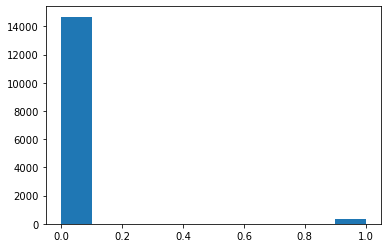

In [15]:
plt.hist(turnover['promotion_last_5years'])
plt.show()

In [4]:
## Frequency table of left
turnover['left'].value_counts() / turnover.shape[0]

0    0.761917
1    0.238083
Name: left, dtype: float64

In [6]:
turnover['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
turnover['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64